# Ejercicio 3
Intente resolver el problema de las N-Reinas usando Hill Climbing y un Algoritmo Evolutivo.

a) Proponga una representación adecuada para las soluciones.

b) Proponga una función de evaluación que le permita cali car que tan buena es una solución.

c) De na de que manera se obtendrán las soluciones vecinas para Hill Climbing y que operadores van a usarse con el Algoritmo Evolutivo.

d) Implemente y pruebe lo de nido en los puntos anteriores para el caso donde N=16. Evalúe los resultados obtenidos. Detalle todos los parámetros usados. Justifique.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import mpld3

%matplotlib inline
mpld3.enable_notebook()

from utils.busqueda_local import hill_climb
from deap import base, creator, tools, algorithms

In [74]:
# -*- coding: utf-8 -*-
"""
Example 3: N-reinas
"""

QUEENS = 16

def amenaza(fila_1, col_1, fila_2, col_2):
    "Determina a partir de sus posiciones si dos reinas se están amenazando."
    return ( (fila_1 == fila_2) or (col_1 == col_2) or
             (abs(fila_1 - fila_2) == abs(col_1 - col_2)) )

"""
Para la cantidad máxima de amenazas, si la reina A amenaza a la reina B, la
reina B también amenaza a la reina A pero sólo se contabiliza como una amenaza.
"""
MAX_AMENAZAS = (QUEENS * (QUEENS-1)) / 2

def printTablero(solucion):
    SIZE = solucion.size
    tablero = np.empty((SIZE, SIZE), np.str_)
    for j in range(SIZE):
        tablero[j, solucion[j]] = 'M'
    print tablero

# Hill Climbing
## Evaluacion

In [3]:
def evaluacion(x):
    t=0
    for i in range(0,x.size-1):
        for j in range(i+1,x.size):
            if amenaza(i,x[i],j,x[j]):
                t+=1
    return -t

## Vecinos

In [4]:
def invertirPos(x,pos1,pos2):
    aaa=x[pos1]
    x[pos1]=x[pos2]
    x[pos2]=aaa
    return x

def vecinos(x):
    v = []
    pos=np.random.randint(0,x.size,3)
    while pos[0]==pos[1] & pos[1]==pos[2]:
        pos=np.random.randint(0,x.size,3)
    v.append(invertirPos(x,pos[0],pos[1]))
    v.append(invertirPos(x,pos[0],pos[2]))
    v.append(invertirPos(x,pos[1],pos[2]))
    return v

## Nuevos

In [5]:
def nuevos(q):
    a=np.arange(q)
    np.random.shuffle(a)
    return a

## Busco

In [76]:
def buscar(reinas, max_iterations=1000):
    mejor = nuevos(reinas)
    for i in range(max_iterations):
        mejor, evaluaciones = hill_climb(mejor, evaluacion, vecinos)
        print ".",
        if evaluacion(mejor)==0:
            print "\nEvaluaciones:" ,evaluaciones, "- Steps:", i
            print "Ganadora:", mejor
            printTablero(mejor)
            break
    if evaluacion(mejor) != 0:
        print "\nNot found, increase max iterations. Iterations: ", max_iterations
    return

In [77]:
buscar(5)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Evaluaciones: 7 - Steps: 86
Ganadora: [3 1 4 2 0]
[['' '' '' 'M' '']
 ['' 'M' '' '' '']
 ['' '' '' '' 'M']
 ['' '' 'M' '' '']
 ['M' '' '' '' '']]


In [51]:
buscar(10, 10000)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

# Algoritmo Evolutivo

In [52]:
QUEENS=16

## Defino Fitness Esperado

In [53]:
creator.create("FitnessMax", base.Fitness, weights=(-1,))
creator.create("Individual", list, fitness=creator.FitnessMax)

## Defino ADN del Individuo

In [54]:
toolbox = base.Toolbox()
toolbox.register("cromo_gen", nuevos, QUEENS)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.cromo_gen)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [55]:
bit = toolbox.cromo_gen()
ind = toolbox.individual()
pop = toolbox.population(n=3)

print("bit is of type %s and has value\n%s" % (type(bit), bit))
print("ind is of type %s and contains %d bits\n%s" % (type(ind), len(ind), ind))
print("pop is of type %s and contains %d individuals\n%s" % (type(pop), len(pop), pop))

bit is of type <type 'numpy.ndarray'> and has value
[ 4 10 11  7  2 15 13  8  5 12  1  0  6  3  9 14]
ind is of type <class 'deap.creator.Individual'> and contains 16 bits
[2, 0, 10, 9, 14, 7, 3, 1, 5, 8, 6, 13, 15, 12, 11, 4]
pop is of type <type 'list'> and contains 3 individuals
[[15, 9, 10, 1, 5, 11, 13, 14, 12, 3, 2, 6, 8, 7, 4, 0], [3, 10, 12, 6, 1, 2, 13, 7, 0, 14, 5, 9, 4, 15, 8, 11], [4, 15, 0, 12, 13, 3, 10, 8, 7, 11, 2, 14, 6, 1, 9, 5]]


## Defino Evaluacion, Seleccion y Mutacion

In [56]:
def evaluarADN(x):
    t=0
    pos=x
    for i in range(0,QUEENS-1):
        for j in range(i+1,QUEENS):
            if amenaza(i,pos[i],j,pos[j]):
                t+=1
    return [t]

In [57]:
toolbox.register("evaluate", evaluarADN)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.20)
toolbox.register("select", tools.selTournament, tournsize=3)

### Pruebo evaluacion

In [58]:
ind = toolbox.individual()
print(ind)
toolbox.evaluate(ind)

[8, 3, 6, 12, 11, 5, 13, 10, 1, 7, 2, 14, 9, 15, 4, 0]


[7]

### Pruebo mutacion

In [59]:
ind = toolbox.individual()
print(ind)
toolbox.mutate(ind)
print(ind)

[0, 15, 5, 10, 11, 8, 13, 4, 14, 9, 2, 1, 6, 7, 3, 12]
[0, 15, 2, 1, 11, 8, 13, 4, 14, 9, 5, 10, 6, 7, 3, 12]


### Pruebo emparejar

In [60]:
ind = toolbox.individual()
print(ind)
ind2 = toolbox.individual()
print(ind2)
toolbox.mate(ind,ind2)

[0, 2, 12, 8, 7, 9, 14, 13, 11, 15, 3, 4, 5, 10, 6, 1]
[8, 11, 7, 14, 13, 10, 4, 12, 1, 15, 6, 2, 9, 5, 3, 0]


([9, 11, 7, 14, 13, 10, 15, 3, 4, 5, 6, 1, 0, 2, 12, 8],
 [10, 2, 12, 8, 7, 9, 4, 1, 15, 6, 5, 3, 0, 11, 14, 13])

### Pruebo seleccion

In [61]:
popu = toolbox.population(n=50)
jeje=toolbox.select(popu,1)
evaluarADN(jeje[0])

[6]

# Busco

In [62]:
def main():    
    pop = toolbox.population(n=1000)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, stats=stats, halloffame=hof, verbose=True)
    
    return pop, logbook, hof

gen	nevals	avg   	min	max
0  	1000  	10.227	3  	24 
1  	615   	8.653 	3  	21 
2  	615   	8     	3  	20 
3  	611   	7.751 	2  	21 
4  	603   	7.28  	1  	19 
5  	613   	7.122 	1  	18 
6  	607   	6.922 	1  	22 
7  	566   	6.653 	1  	19 
8  	566   	6.663 	1  	20 
9  	600   	6.479 	1  	20 
10 	593   	6.517 	1  	22 
Best individual is: [9, 13, 6, 5, 3, 11, 0, 12, 4, 2, 10, 14, 1, 8, 15, 7]
with fitness: (1.0,)


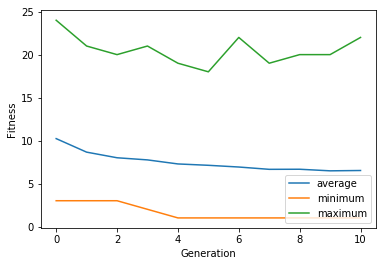

In [63]:
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average")
    plt.plot(gen, min_, label="minimum")
    plt.plot(gen, max_, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")

In [82]:
printTablero(np.array(hof[0]))

[['' '' '' '' '' '' '' '' '' 'M' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '' '' '' '' '' '' 'M' '' '']
 ['' '' '' '' '' '' 'M' '' '' '' '' '' '' '' '' '']
 ['' '' '' '' '' 'M' '' '' '' '' '' '' '' '' '' '']
 ['' '' '' 'M' '' '' '' '' '' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '' '' '' '' 'M' '' '' '' '']
 ['M' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '' '' '' '' '' 'M' '' '' '']
 ['' '' '' '' 'M' '' '' '' '' '' '' '' '' '' '' '']
 ['' '' 'M' '' '' '' '' '' '' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '' '' '' 'M' '' '' '' '' '']
 ['' '' '' '' '' '' '' '' '' '' '' '' '' '' 'M' '']
 ['' 'M' '' '' '' '' '' '' '' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '' 'M' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '' '' '' '' '' '' '' '' 'M']
 ['' '' '' '' '' '' '' 'M' '' '' '' '' '' '' '' '']]
